In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns

In [3]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-3 Python Linear Regression Insurance Data Prediction Analysis

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-3 Python Linear Regression Insurance Data Prediction Analysis


# Part-1: Data Exploration and Pre-processing


In [4]:
# 1) Load the given dataset
df=pd.read_csv("Python_Linear_Regres.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
# 2) Fill Null value of children column with the value 0
df['children'].replace(0,0)

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [10]:
# 3) Replace the Null values of the column bmi with mean value
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [11]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

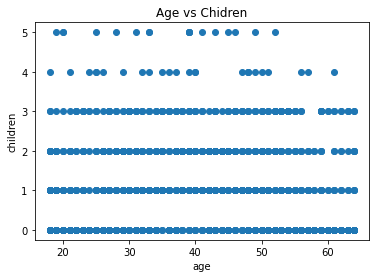

In [12]:
# 4) Display a scatter plot between age and children
x=plt.xlabel('age')
y=plt.ylabel('children')
plt.title('Age vs Chidren')
plt.scatter(df.age,df.children);

<BarContainer object of 1338 artists>

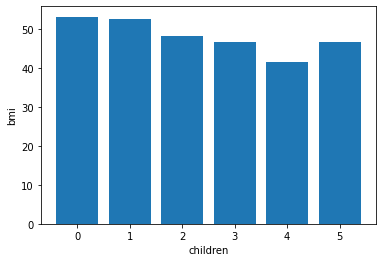

In [13]:
# 5) Display bar plot between bmi and children
x=plt.xlabel('children')
y=plt.ylabel('bmi')
plt.bar(df.children,df.bmi,data=df)

In [14]:
# 6) Perform encoding to convert character data into numerical data
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder=LabelEncoder()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df[['sex','smoker','region']]=df[['sex','smoker','region']].apply(labelencoder.fit_transform)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


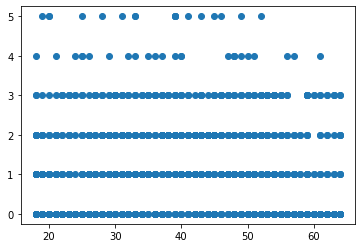

In [26]:
plt.scatter(df.age,df.children)

In [27]:
x=df.drop(['charges'],axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
x.shape

(1338, 6)

In [30]:
y.shape

(1338,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [34]:
x_train

,age,sex,bmi,children,smoker,region
559,19,1,35.530,0,0,1
273,50,1,27.455,1,0,0
471,18,0,30.115,0,0,0
22,18,1,34.100,0,0,2
939,53,1,29.480,0,0,2
...,...,...,...,...,...,...
1180,42,0,41.325,1,0,0
1147,20,0,31.920,0,0,1
527,51,0,25.800,1,0,3
1149,42,1,34.100,0,0,3


In [35]:
x_test

,age,sex,bmi,children,smoker,region
7,37,0,27.740,3,0,1
999,36,0,26.885,0,0,1
1209,59,1,37.100,1,0,3
491,61,0,25.080,0,0,2
625,29,0,26.030,0,0,1
...,...,...,...,...,...,...
271,50,1,34.200,2,1,3
695,26,0,40.185,0,0,1
1039,19,1,27.265,2,0,1
323,57,1,40.945,0,0,0


In [36]:
y_train

559     1646.42970
273     9617.66245
471     2203.47185
22      1137.01100
939     9487.64420
           ...    
1180    7650.77375
1147    2261.56880
527     9861.02500
1149    5979.73100
1289    7147.47280
Name: charges, Length: 1070, dtype: float64

In [37]:
y_test

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
271     42856.83800
695      3201.24515
1039    22493.65964
323     11566.30055
835      7160.33030
Name: charges, Length: 268, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
rm=LinearRegression()

In [40]:
rm.fit(x_train,y_train)

LinearRegression()

In [41]:
rm.score(x_train,y_train)

0.7633895728397835

In [42]:
rm.score(x_test,y_test)

0.6957010622294884

In [43]:
slope=rm.coef_
slope

array([  259.75034267,  -261.69821175,   344.69754783,   544.25205168,
       24080.83549437,  -253.91502289])

In [44]:
intercept=rm.intercept_
intercept

-12512.480220644475

In [45]:
y_predict=rm.predict(x_test)
y_predict

array([ 8039.0335671 ,  5851.81066599, 15121.87779259, 11469.47513591,
        3738.84186392,  9586.0428061 ,  9507.61458808, 26051.46631684,
        7763.05611133, 30735.58645808,  1701.73460515,  4163.1476031 ,
        7367.56347239, 11198.48718218, 12877.87722176, 11103.43087865,
        5733.97000282, 18180.06664578, 10647.5672011 , 30862.07022771,
       34086.19231559,  4284.98007352,  1233.74191862,  7300.46349407,
        4479.1354247 , 13365.14309839, 11769.87470428, 10293.5357675 ,
        6356.44385932, 30974.36801269, -1775.65554328, 33931.50289922,
        9626.39019922,  7373.2209696 ,  8217.52602351, 12098.64755342,
       13424.24817602, 12621.49432311,  9905.96182142,  8426.30849029,
       16046.06595926,  9791.18108222,  5491.6017285 , 11491.10140168,
        5574.35480774,  7457.63797955,  6593.08566755, 34198.96778869,
       11065.12121643, 10621.11604773, 32822.68537667,  5665.63513704,
       10313.40133263, 14611.5432172 , 11291.02780775, 13444.86400961,
      

In [100]:
mse=mean_squared_error(y_test,y_predict)
mse

44017.500997835785

In [102]:
mae=mean_absolute_error(y_test,y_predict)
mae

135.3652441828616

In [103]:
rmse=np.sqrt(mse)
rmse

209.8034818534616

In [104]:
print("Slope =",slope)
print("Inercept =",intercept)
print("Mean Sqarred Value is=",mae)
print("Mean Absolute Value is=",mae)
print("Root Mean Sqarred Value is=",rmse)

Slope = [ 1.50499566e+01 -2.64903755e+01  1.94481038e-01  3.04014446e+01
  6.56672152e+02 -1.40615434e+01]
Inercept = 160.50485370737914
Mean Sqarred Value is= 135.3652441828616
Mean Absolute Value is= 135.3652441828616
Root Mean Sqarred Value is= 209.8034818534616


In [46]:
# 7) Perform scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_ss=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_ss.head()


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


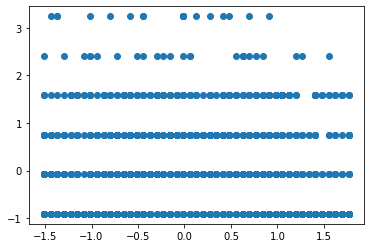

In [48]:
plt.scatter(df_ss.age,df_ss.children)

In [49]:
X=df_ss.drop('charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [50]:
Y=df_ss['charges']
Y

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [63]:
X_train

,age,sex,bmi,children,smoker,region
621,-0.157143,0.989591,0.563756,2.410772,1.970587,1.343905
194,-1.509965,0.989591,0.617890,-0.908614,-0.507463,0.438495
240,-1.153959,-1.010519,0.985350,0.751079,1.970587,-1.372326
1168,-0.513149,0.989591,0.744205,0.751079,-0.507463,1.343905
1192,1.338082,-1.010519,0.284060,-0.078767,-0.507463,-1.372326
...,...,...,...,...,...,...
763,-0.869155,0.989591,-0.760083,-0.908614,-0.507463,-1.372326
835,0.198863,0.989591,0.870519,0.751079,-0.507463,0.438495
1216,0.056461,0.989591,-0.915925,-0.908614,-0.507463,0.438495
559,-1.438764,0.989591,0.798339,-0.908614,-0.507463,-0.466915


In [64]:
X_test

,age,sex,bmi,children,smoker,region
578,0.910875,0.989591,-0.076018,-0.078767,-0.507463,1.343905
610,0.554869,-1.010519,-0.212175,-0.078767,-0.507463,0.438495
569,0.626070,0.989591,1.624303,0.751079,1.970587,-0.466915
1034,1.551686,0.989591,1.265866,-0.908614,-0.507463,-0.466915
198,0.839674,-1.010519,-2.069158,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1084,1.622887,-1.010519,-0.027625,0.751079,-0.507463,-0.466915
726,0.127662,0.989591,-0.370478,-0.078767,-0.507463,-0.466915
1132,1.266881,0.989591,1.577551,-0.908614,-0.507463,-1.372326
725,-0.655551,-1.010519,1.375776,1.580926,1.970587,0.438495


In [65]:
Y_train

621     2.223110
194    -1.002269
240     2.085105
1168   -0.710404
1192   -0.020756
          ...   
763    -0.842561
835    -0.504737
1216   -0.648860
559    -0.960225
684    -0.702525
Name: charges, Length: 1070, dtype: float64

In [66]:
Y_test

578    -0.292916
610    -0.390131
569     2.679083
1034   -0.026463
198    -0.299548
          ...   
1084    0.144508
726    -0.545681
1132    0.614482
725     2.285080
963    -0.311417
Name: charges, Length: 268, dtype: float64

In [67]:
from sklearn.linear_model import LinearRegression

In [58]:
rms=LinearRegression()

In [68]:
rms.fit(X_train,Y_train)

LinearRegression()

In [69]:
rms.score(X_train,Y_train)

0.7368306228430945

In [70]:
rms.score(X_test,Y_test)

0.799874714544996

In [71]:
Y_predict=rms.predict(X_test)
Y_predict

array([-0.18612982, -0.2877119 ,  2.04240969,  0.2356251 , -0.5237017 ,
       -0.76836259, -0.96804366,  0.08366347, -0.35661466, -0.48230011,
       -0.72081751, -0.24973365, -0.38109293, -0.75537862,  1.20118234,
       -0.18428218, -0.16678196, -0.59802744, -0.42105126,  1.13741995,
        1.67753925,  0.08233161, -0.13096535,  1.58081383, -0.73155026,
       -0.34070097, -1.00306209, -0.26279616, -0.75854809, -0.24067681,
       -0.35588675,  2.22831749,  0.18235505,  0.03277135,  0.9475952 ,
       -0.67245265, -0.03531756,  1.42546784,  1.66523632, -0.80808722,
       -0.7656253 , -0.74283806,  1.42009545,  2.15429163,  1.21704715,
       -0.68294907, -0.19323455, -0.45367347, -0.79816099, -0.22411854,
       -0.63118796, -0.81711692,  1.61722017,  2.07249546,  0.24662026,
       -0.51282639, -0.60286218, -0.31989908, -0.33147098, -0.13012673,
       -0.95586886,  2.1099323 ,  0.15780961, -0.13446803,  0.05857994,
        0.04719226,  1.05697178,  1.55486059, -0.99949755, -0.26

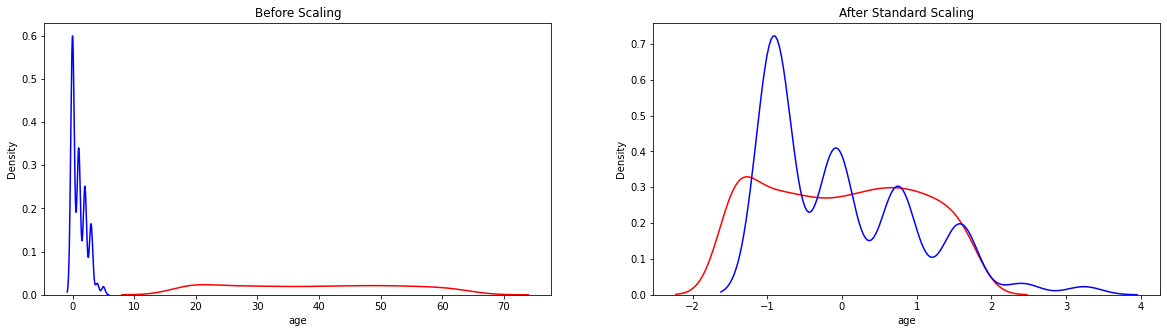

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5)) 
ax1.set_title('Before Scaling') 
  
sns.kdeplot(df['age'], ax = ax1, color ='r') 
sns.kdeplot(df['children'], ax = ax1, color ='b') 
ax1.set_title('Before Scaling') 
  
sns.kdeplot(df_ss['age'], ax = ax2, color ='red') 
sns.kdeplot(df_ss['children'], ax = ax2, color ='blue') 
ax2.set_title('After Standard Scaling') 
plt.show() 

In [74]:
slope_s = rms.coef_
slope_s

array([ 0.29467978, -0.00100464,  0.16537231,  0.04417109,  0.78568186,
       -0.02632275])

In [75]:
intercept_s=rms.intercept_
intercept_s

-0.0034218289728232872

In [76]:
mse=mean_squared_error(Y_test,Y_predict)
mse

0.2173149169772331

In [77]:
mae=mean_absolute_error(Y_test,Y_predict)
mae

0.32467375589128755

In [78]:
rmse=np.sqrt(mse)
rmse

0.4661704805939916

In [79]:
print("Slope =",slope)
print("Inercept =",intercept)
print("Mean Sqarred Value is=",mae)
print("Mean Absolute Value is=",mae)
print("Root Mean Sqarred Value is=",rmse)

Slope = [  259.75034267  -261.69821175   344.69754783   544.25205168
 24080.83549437  -253.91502289]
Inercept = -12512.480220644475
Mean Sqarred Value is= 0.32467375589128755
Mean Absolute Value is= 0.32467375589128755
Root Mean Sqarred Value is= 0.4661704805939916
